In [4]:
# Load needed Modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# **Data Wrangling**
- In this section, we will clean the dataset by removing empty and duplicate values,  
and prepare the column names to make the data ready for analysis



In [5]:
# load the datset into DataFrmae 
df = pd.read_csv("E:\\data\\taskk\\Instagram data.csv", encoding='latin1')

In [6]:
# display first rws
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...


In [7]:
# Check the size of columns and rows in the data
df.shape

(119, 13)

In [8]:
# check for data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [9]:
# Make a backup copy
df_copy=df.copy()

In [10]:
# Check for repeating values in data
df.duplicated().sum()

np.int64(17)

In [11]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
#check drop duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
#View column names
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [14]:
#Change and modification of column names
df.rename(columns={
    'From Home': 'from_home',
    'From Hashtags': 'from_hashtags',
    'From Explore': 'from_explore',
    'From Other': 'from_other',
    'Profile Visits': 'profile_visits'
}, inplace=True)

In [15]:
# display first rws
df.head(1)

,Impressions,from_home,from_hashtags,from_explore,from_other,Saves,Comments,Shares,Likes,profile_visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...


In [16]:
# New column with the number of words in each caption
df['caption_length']=df['Caption'].apply(lambda x :len(x.split()))

In [17]:
# New column with the number of hashtags
df['Hashtags_length']=df['Hashtags'].apply(lambda x :len(x.split()))

In [18]:
# Check New column
df.head(2)

,Impressions,from_home,from_hashtags,from_explore,from_other,Saves,Comments,Shares,Likes,profile_visits,Follows,Caption,Hashtags,caption_length,Hashtags_length
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,16,22
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,34,18


# Exploratory Data Analysis (EDA)

- In this part, we will analyze the dataset to extract insights and achieve the main goals of the project.  
- We will focus on calculating key percentages, exploring relationships between columns, and identifying patterns that explain post performance.

In [19]:
# Calculate the percentage of impressions from Explore
df['explore_rate'] = ((df['from_explore'] / df['Impressions']) * 100).round(2)

In [20]:
# Check New column
df.head(1)

,Impressions,from_home,from_hashtags,from_explore,from_other,Saves,Comments,Shares,Likes,profile_visits,Follows,Caption,Hashtags,caption_length,Hashtags_length,explore_rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,16,22,15.79


In [21]:
# Define trend levels by dividing explore_rate into three quartiles (Q40, Q65, Q85)
# This will categorize posts as Low, Medium, or High, Very high trending


q40=df['from_explore'].quantile(0.40)
q65=df['from_explore'].quantile(0.65)
q85=df['from_explore'].quantile(0.85) 


# Check
print(q40,q65,q85)

249.4 543.6 1229.2499999999995


In [22]:
# Publication trend level
def get_trend_level(x):
    if x <= q40:
        return 'Low'
    elif x <= q65:
        return 'Medium'
    elif x <= q85:
        return 'high'
    else :
        return 'Very high'

In [23]:
# Apply function to create trend_level column
df['trend_level'] = df['from_explore'].apply(get_trend_level)

In [24]:
# Check sample
df.sample(1)

,Impressions,from_home,from_hashtags,from_explore,from_other,Saves,Comments,Shares,Likes,profile_visits,Follows,Caption,Hashtags,caption_length,Hashtags_length,explore_rate,trend_level
112,11149,4439,747,5762,53,273,4,13,210,61,58,Python is one of the best programming language...,#python #pythonprogramming #pythoncode #python...,42,12,51.68,Very high


In [25]:
# Check if views translate to engagement
df['engagement_rate']=((df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']) / df['Impressions'] * 100).round(2)

In [26]:
# Check sample
df.sample(1)

,Impressions,from_home,from_hashtags,from_explore,from_other,Saves,Comments,Shares,Likes,profile_visits,Follows,Caption,Hashtags,caption_length,Hashtags_length,explore_rate,trend_level,engagement_rate
26,5394,2275,2975,45,65,61,19,6,147,69,6,You must have heard or invested in any cryptoc...,#data #datascience #dataanalysis #dataanalytic...,63,19,0.83,Low,4.32


In [108]:
# Top 3 posts by number of new followers
top4_followers=df.sort_values('Impressions',ascending=False).head(4)
# Check top 3
top4_followers

,Impressions,from_home,from_hashtags,from_explore,from_other,Saves,Comments,Shares,Likes,profile_visits,Follows,Caption,Hashtags,caption_length,Hashtags_length,explore_rate,trend_level,engagement_rate,main_Hashtags
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,"[#python, #pythonprogramming, #pythonprojects,...",14,11,44.54,Very high,3.05,#python
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,"[#datascience, #datasciencejobs, #datasciencet...",16,17,53.26,Very high,5.26,#datascience
109,17713,2449,2141,12389,561,504,3,23,308,70,96,Here are some of the best resources to learn S...,"[#sql, #mysql, #datascience, #datasciencejobs,...",13,19,69.94,Very high,4.73,#sql
107,17396,1817,10008,5192,251,285,7,7,416,467,260,Here is a list of 100+ Machine Learning Algori...,"[#machinelearning, #machinelearningalgorithms,...",52,17,29.85,Very high,4.11,#machinelearning


In [28]:
# Split hashtags into a list
df['Hashtags']=df['Hashtags'].str.split()

In [29]:
# Show the first used hashtag
df['main_Hashtags']=df['Hashtags'].apply(lambda x : x[0])

In [30]:
# Check
df.head(1)

,Impressions,from_home,from_hashtags,from_explore,from_other,Saves,Comments,Shares,Likes,profile_visits,Follows,Caption,Hashtags,caption_length,Hashtags_length,explore_rate,trend_level,engagement_rate,main_Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[#finance, #money, #business, #investing, #inv...",16,22,15.79,high,6.99,#finance


# Find the top 5 most used hashtags using collections

In [90]:
# Load needed Modules
from collections import Counter

In [91]:
all_Hashtags=(S for X in df['Hashtags'] for S in X )

In [92]:
total_Hashtags=Counter(all_Hashtags).most_common(10)

In [93]:
total_Hashtags

[('#amankharwal', 100),
 ('#thecleverprogrammer', 100),
 ('#python', 93),
 ('#pythonprogramming', 84),
 ('#pythonprojects', 82),
 ('#machinelearning', 81),
 ('#datascience', 79),
 ('#ai', 77),
 ('#artificialintelligence', 75),
 ('#data', 74)]

In [94]:
# Convert total_hashtags to a DataFrame
total_Hashtags_df=pd.DataFrame(total_Hashtags,columns=['Hashtags','count'])
total_Hashtags_df

,Hashtags,count
0,#amankharwal,100
1,#thecleverprogrammer,100
2,#python,93
3,#pythonprogramming,84
4,#pythonprojects,82
5,#machinelearning,81
6,#datascience,79
7,#ai,77
8,#artificialintelligence,75
9,#data,74


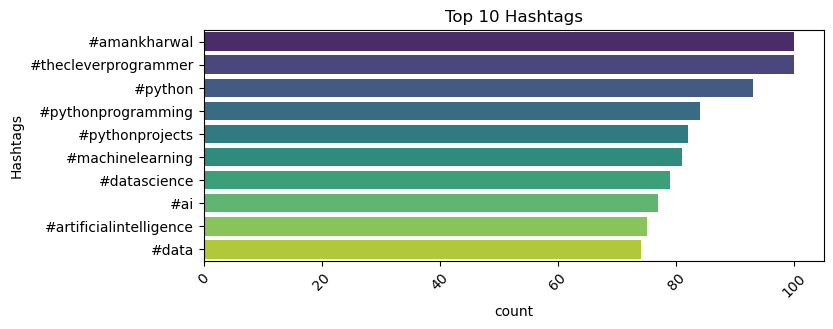

In [107]:
# Plot the top 10 hashtags using a bar chart with Seaborn
plt.figure(figsize=(8,3))
sns.barplot(data=total_Hashtags_df,x='count',y='Hashtags',palette='viridis',hue='Hashtags')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
plt.show()


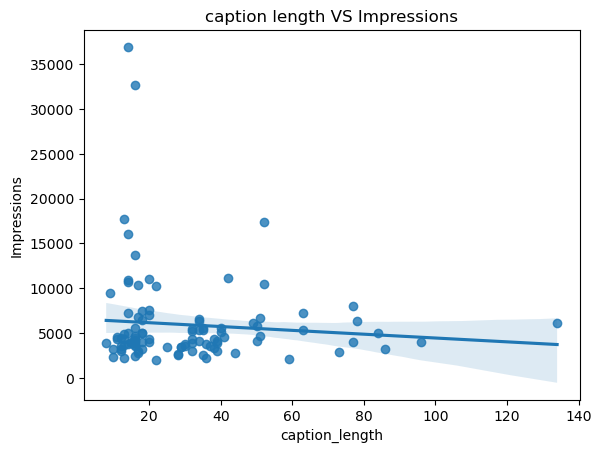

In [133]:
# Explore relationship between caption word count and impressions
sns.regplot(data=df,x='caption_length',y='Impressions')
plt.title('caption length VS Impressions')
plt.show()

-  Caption length vs. impressions: very weak inverse relationship, generally stable

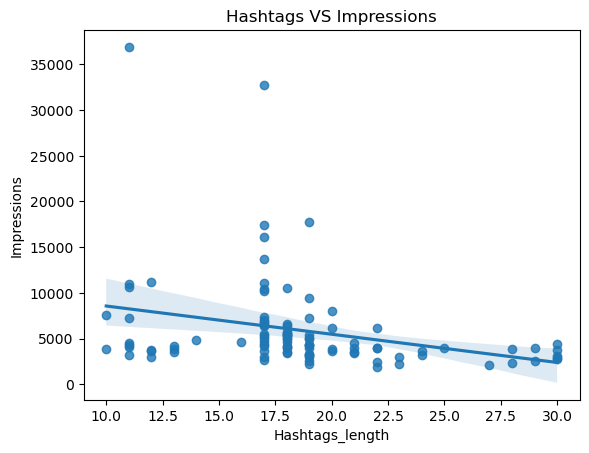

In [135]:
# Explore relationship between Hashtags word count and impressions
sns.regplot(data=df,x='Hashtags_length',y='Impressions')
plt.title('Hashtags VS Impressions')
plt.show()

- Hashtag length vs. impressions: Very weak inverse relationship, tends to stabilize

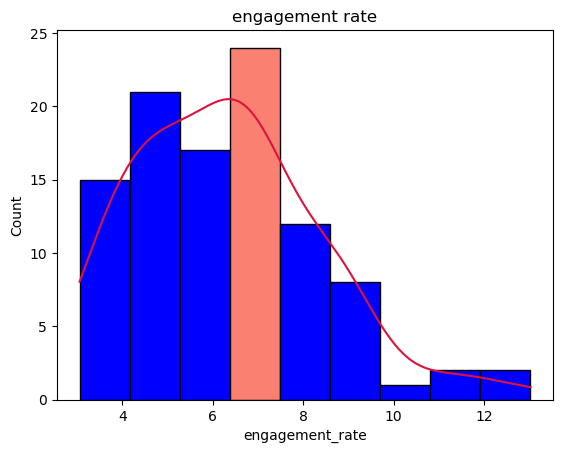

In [136]:
# Distribution of the percentage of audience participation rate
ax=sns.histplot(df['engagement_rate'],kde=True,color='b',alpha=1)
ax.lines[0].set_color('crimson')
ax.patches[3].set_facecolor('salmon')
plt.title('engagement rate')
plt.show()

- Most posts have an engagement rate of 6.9 to 7.9

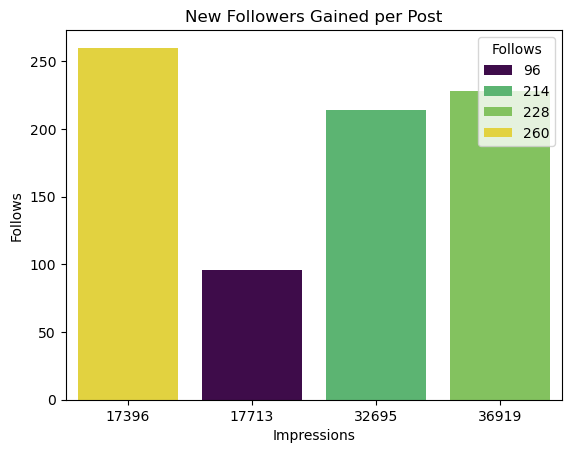

In [137]:
#Top 4 Appearances That Increased New Followers
sns.barplot(data=top4_followers,x='Impressions',y='Follows',palette='viridis',hue='Follows')
plt.title('New Followers Gained per Post')
plt.show()

- High impressions don’t always lead to many new followers; some posts perform differently

In [38]:
#Explore, Profile Visits, Follows, and From Other are correlated, showing how post reach translates to engagement and follower growth
corr_df=df[['from_other','profile_visits','Follows','from_explore']].corr()

In [39]:
#Check
corr_df

,from_other,profile_visits,Follows,from_explore
from_other,1.000000,0.627791,0.537115,0.490258
profile_visits,0.627791,1.000000,0.852748,0.530046
Follows,0.537115,0.852748,1.000000,0.795342
from_explore,0.490258,0.530046,0.795342,1.000000


In [ ]:
total_

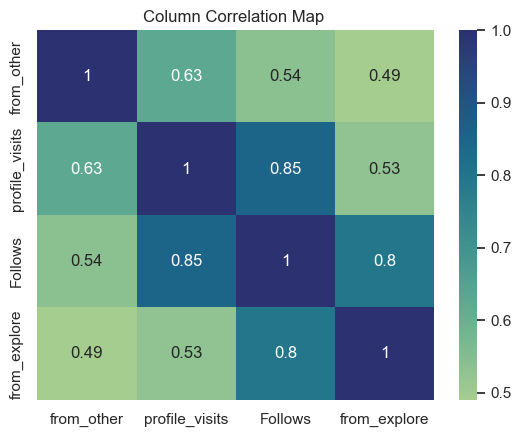

In [40]:
# Column Correlation Map 
sns.set_theme(style="whitegrid")
sns.heatmap(corr_df,annot=True,cmap='crest')
plt.title('Column Correlation Map ')
plt.show()

- Strongest positive correlation is between Follows and Profile Visits (0.85),
-  indicating a very strong relationship.
- Weakest positive correlation is between From Other and From Explore (0.49)

- # Generate a WordCloud from all hashtags to visualize the most frequently used ones

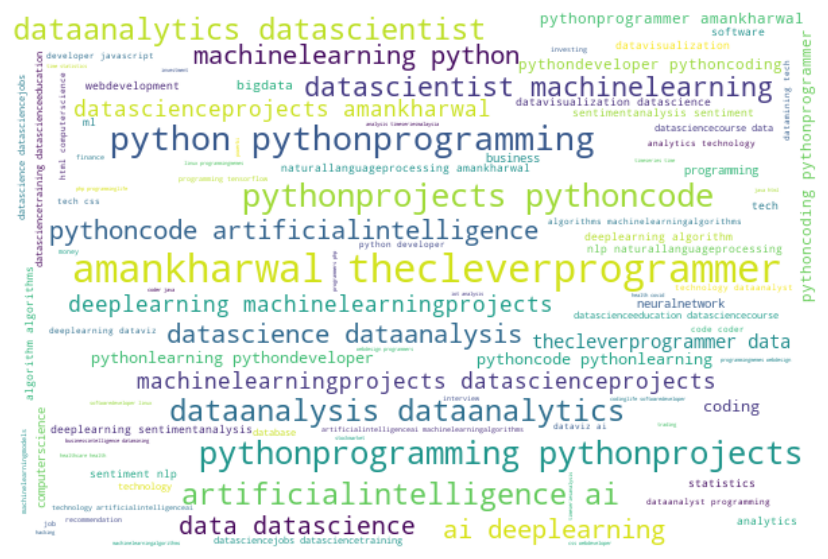

In [128]:
from wordcloud import WordCloud

all_hashtags = ' '.join([' '.join(tags) for tags in df['Hashtags']])
wordcloud = WordCloud(width=600, height=400, background_color='white', max_words=100).generate(all_hashtags)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


- #  Conclusion

- Average engagement rate: 6.32%, indicating moderate audience interaction.

- Top-performing content: Tech and coding posts (#amankharwal, #thecleverprogrammer, #python, #pythonprogramming, #pythonprojects) achieve the best reach.

- Follower growth driver: Strong correlation (0.85) between profile visits and new followers – attracting visitors is key.

- Content length effect: Hashtag and caption length have weak negative impact on impressions; longer text doesn’t guarantee higher reach.

- Engagement impact: Posts with higher likes, saves, comments, and shares consistently gain better visibility.

- **Key Insight** 
- Maximizing reach and follower growth requires high-quality, engaging content that encourages real audience interaction, rather than relying on many or lengthy hashtags